<a href="https://colab.research.google.com/github/mohamedahmedhimdan/Jupyter-notebook-as-per-Exercise-12/blob/main/Real_Estate_Investment_Trust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [6]:

print("Available columns:")
print(df.columns.tolist())

columns_to_drop = []
if 'id' in df.columns:
    columns_to_drop.append('id')
if 'Unnamed: 0' in df.columns:
    columns_to_drop.append('Unnamed: 0')

if columns_to_drop:
    df.drop(columns_to_drop, axis=1, inplace=True)

df.describe()

Available columns:
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


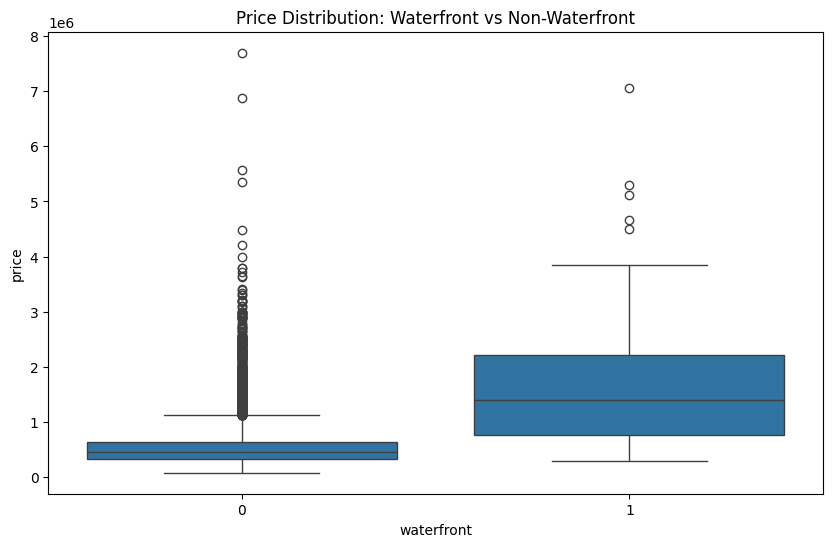

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Price Distribution: Waterfront vs Non-Waterfront')
plt.show()

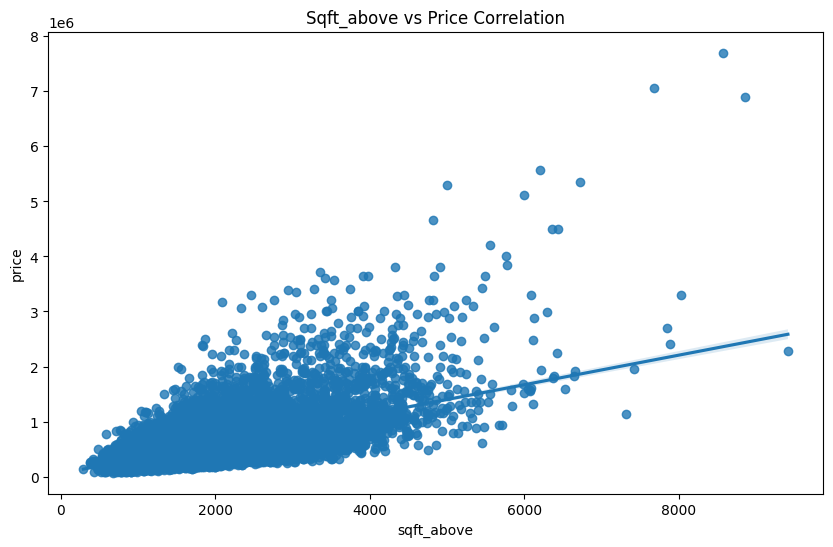

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='sqft_above', y='price')
plt.title('Sqft_above vs Price Correlation')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
X = df[['sqft_living']]
y = df['price']
lr = LinearRegression()
lr.fit(X, y)
r2_score = lr.score(X, y)
print(f"R^2 Score: {r2_score}")

R^2 Score: 0.4928532179037931


In [11]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
"view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X_multi = df[features]
y = df['price']
lr_multi = LinearRegression()
lr_multi.fit(X_multi, y)
r2_multi = lr_multi.score(X_multi, y)
print(f"R^2 Score: {r2_multi}")

R^2 Score: 0.6577151058279325


In [12]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
('scaler', StandardScaler()),
('poly', PolynomialFeatures(degree=2)),
('regressor', LinearRegression())
])
X_pipeline = df[features]
y_pipeline = df['price']
pipeline.fit(X_pipeline, y_pipeline)
r2_pipeline = pipeline.score(X_pipeline, y_pipeline)
print(f"Pipeline R^2 Score: {r2_pipeline}")

Pipeline R^2 Score: 0.7513467656307783


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'],
test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test, y_test)
print(f"Ridge Regression R^2 Score: {r2_ridge}")

Ridge Regression R^2 Score: 0.6544903700493674


In [14]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)
r2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print(f"Ridge Regression with Polynomial R^2 Score: {r2_ridge_poly}")

Ridge Regression with Polynomial R^2 Score: 0.7002219814248714
